In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import operator
from collections import defaultdict
import math
import sys




from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_style({'font.family':'serif'})


sys.path.insert(0, '../../')


from plot.plot_utils import *
from semi_synthetic_graphs.src.config import iterations, alpha

In [2]:
mapping_configurations = {
    "N0": "TUENTI-A16",
    "N1": {"s_m": 0.1, "h_m": 0.4, "h_M": 0.0},}

vec_algoname = ["als", "salsa", "ada", "random"]

vec_policy = ["lazy", "fc", "random"]

recsys_dict = {"ada": "A-ADA",
              "random": "A-RND",
              "als": "A-ALS",
              "salsa": "A-SLS"}

policy_dict = {"random": "P-RND",
              "fc": "P-FLC",
              "lazy": "P-LZY"}

markers = ["d", ">", "o",]

colors = ["red", "blue", "darkorange"]


In [3]:
track_all_visibilities = {} #questo mi mappa i pickle del numero di volte che i colori sono stati raccomandati per ogni configurazione

"""
track_all_visibilities[configurazione + recsys + policy][iterazione][colore] = numero di volte che è stato raccomandato

"""

mapping_configuration_folder = {} #mi mappa la directory che mi serve per ogni configurazione

"""

mapping_configuration_folder[configurazione + recsys + policy] = directory

"""

for configuration in mapping_configurations:
    
    N = mapping_configurations[configuration]

    for algoname in vec_algoname:
        
        for policy in vec_policy:

            if configuration == "N0":

                directory = "../../dataset/out/" + N



                foldername = (N,
                                "it" + str(iterations),
                                "sampling" + str(alpha),
                                "policy-" + str(policy),
                                "algoname-" + str(algoname))

                foldername = "_".join(foldername)

            else:

                directory = "../../semi_synthetic_graphs/out/synth/"

                s_m = N["s_m"]

                h_m = N["h_m"]

                h_M = N["h_M"]

                folder1 = ("sim20-topk3-TUENTI-A16",
                             "s_m" + str(s_m),
                             "hm" + str(h_m),
                             "hM" + str(h_M))

                folder1 = "-".join(folder1)

                folder2 = "policy-" + policy + "_algoname-" + algoname

                foldername = folder1 + "/" + folder2


            mapping_configuration_folder[configuration + "_" + policy + "_" + algoname] = directory + "/" + foldername

            with open(directory + "/" + foldername + "/track_visibility.p", "rb") as f:
                track_all_visibilities[configuration + "_" + policy + "_" + algoname] = pickle.load(f)

In [4]:
visibility_and_percentage_edge_for_configuration = {} #mi mappa per ogni configurazione la visibility della minority e la % di archi aggiunti

"""

visibility_and_percentage_edge_for_configuration[configurazione + recsys + policy]['percentage_edge_accepted'] = lista % archi aggiunti

visibility_and_percentage_edge_for_configuration[configurazione + recsys + policy]["V_m"] = lista visibility minority per ogni iterazione

visibility_and_percentage_edge_for_configuration[configurazione + recsys + policy]['minority_size'] = minority size


"""


for configuration in mapping_configurations:
    
    print("----")
    print(configuration)
    
    if configuration == "N0":
        
        s_m = 0.3 ## la size di tuenti-a16
        
    else:
        
        s_m = mapping_configurations[configuration]["s_m"]

    for algoname in vec_algoname:
        
        for policy in vec_policy:


            config_algoname = configuration + "_" + policy + "_" + algoname
            
            print(config_algoname)


            folder = mapping_configuration_folder[config_algoname]

            visibility_and_percentage_edge_for_configuration[config_algoname] = dict.fromkeys(["percentage_edge_accepted", "V_m", "minority_size"])

            visibility_and_percentage_edge_for_configuration[config_algoname]["minority_size"] = s_m

            with open(folder + "/final-graph.p", "rb") as f:
                final_graph = pickle.load(f)

            percentage_edge_accepted = percentage_edge_added(final_graph, iterations)

            visibility_and_percentage_edge_for_configuration[config_algoname]["percentage_edge_accepted"] = percentage_edge_accepted


            vis_min = []

            for iteration in range(iterations):

                red_recommended = track_all_visibilities[config_algoname][iteration]["red"]

                blue_recommended = track_all_visibilities[config_algoname][iteration]["blue"]

                total_recommended = red_recommended + blue_recommended

                V_min = red_recommended/total_recommended

                vis_min.append(V_min)

            visibility_and_percentage_edge_for_configuration[config_algoname]["V_m"] = vis_min

----
N0
N0_lazy_als
N0_fc_als
N0_random_als
N0_lazy_salsa
N0_fc_salsa
N0_random_salsa
N0_lazy_ada
N0_fc_ada
N0_random_ada
N0_lazy_random
N0_fc_random
N0_random_random
----
N1
N1_lazy_als
N1_fc_als
N1_random_als
N1_lazy_salsa
N1_fc_salsa
N1_random_salsa
N1_lazy_ada
N1_fc_ada
N1_random_ada
N1_lazy_random
N1_fc_random
N1_random_random


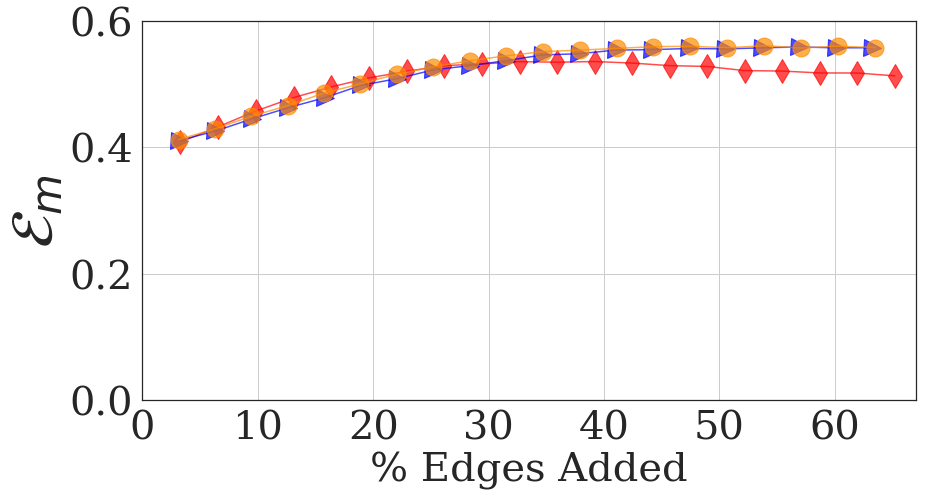

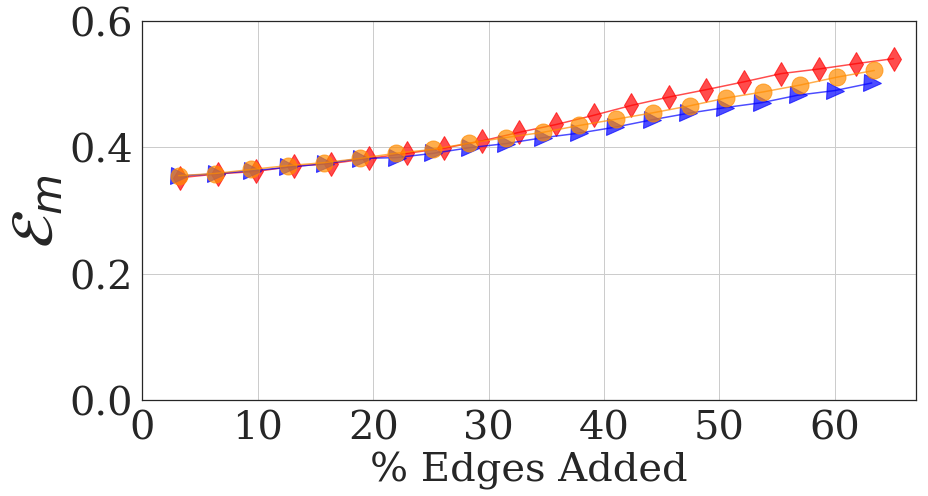

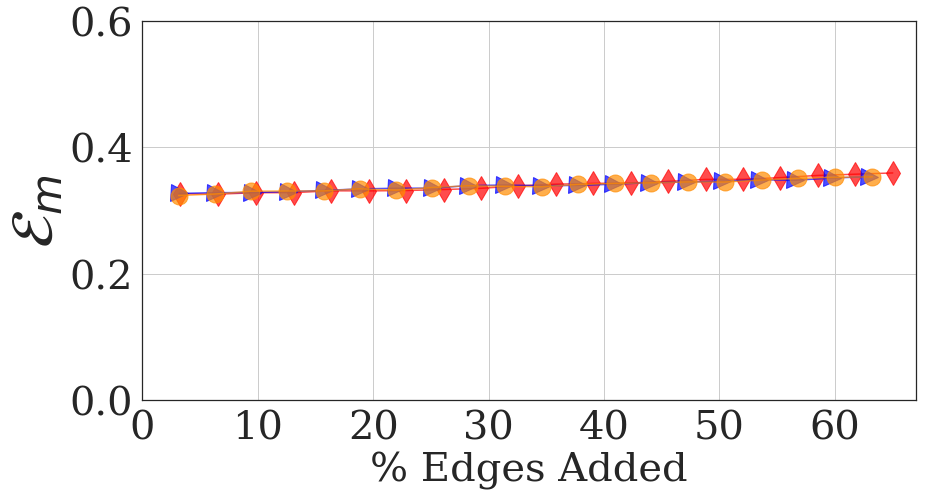

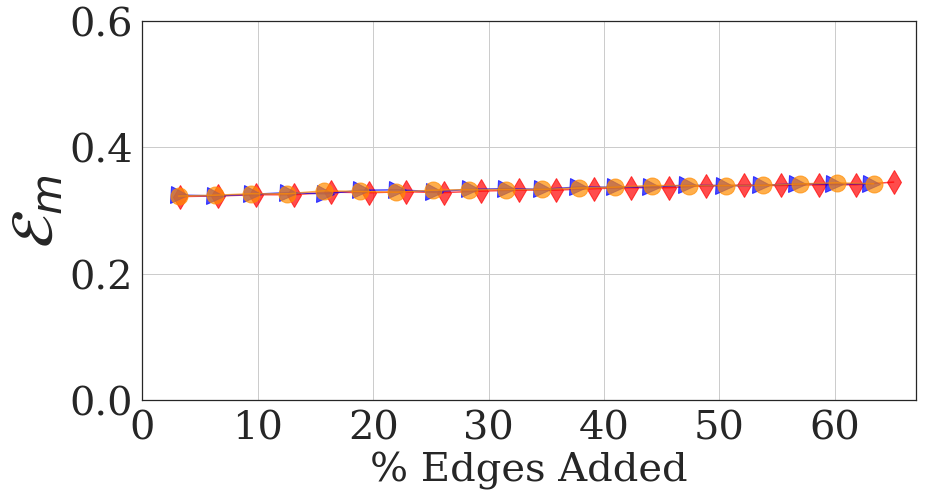

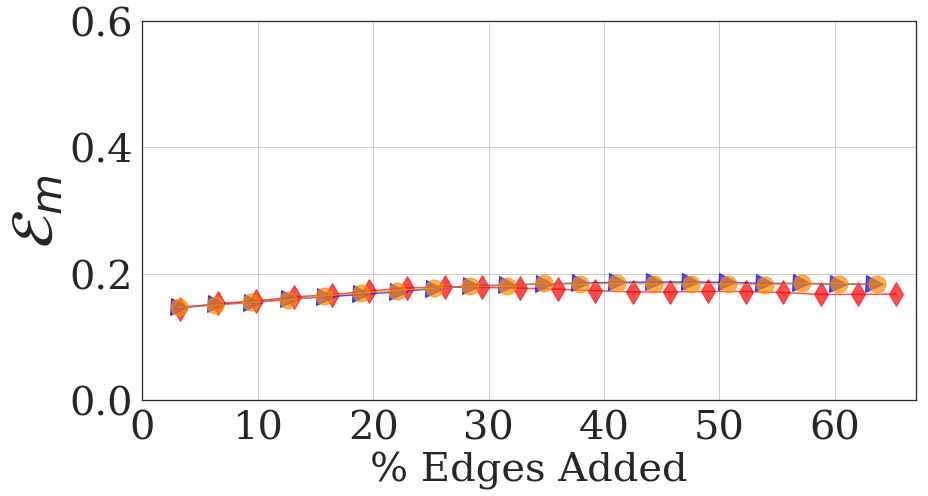

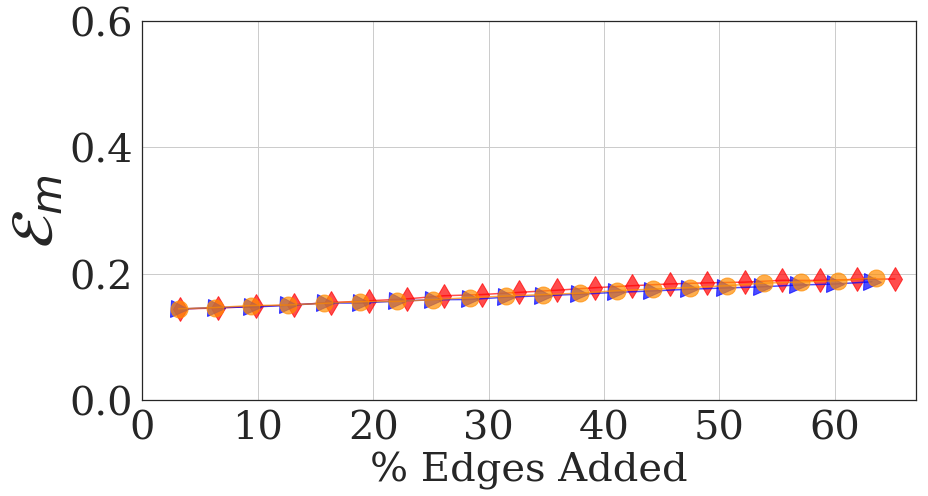

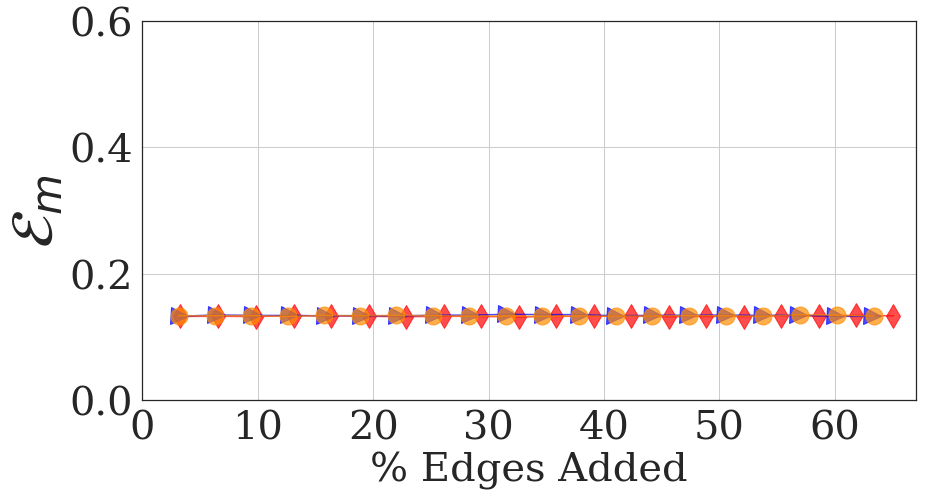

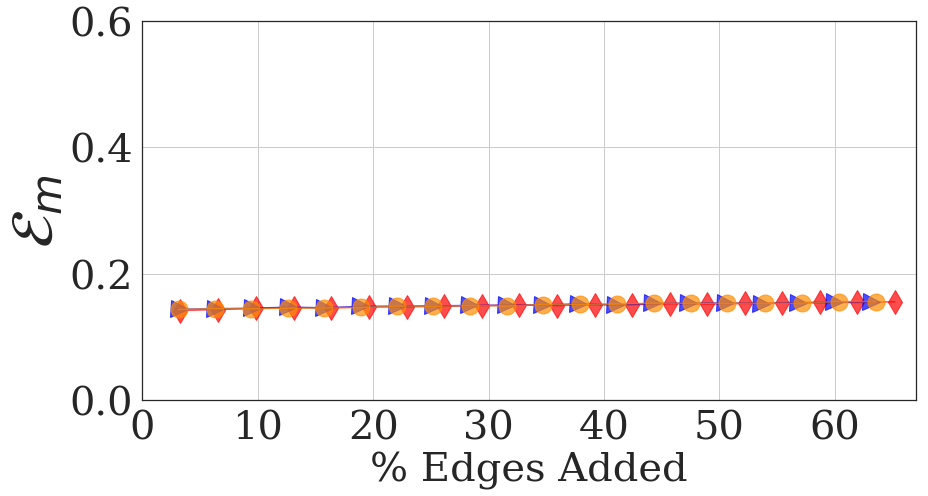

In [5]:
for configuration in mapping_configurations:
    
    for algoname in vec_algoname:
        
        fig = plt.figure(figsize=(13, 7))
        ax = fig.add_subplot(111)
        
        for policy, marker, color in zip(vec_policy, markers, colors):
            
            config_algoname = configuration + "_" + policy + "_" + algoname
            
            x = visibility_and_percentage_edge_for_configuration[config_algoname]["percentage_edge_accepted"]
        
            y = visibility_and_percentage_edge_for_configuration[config_algoname]["V_m"]

            plc = policy_dict[policy]
            recsys = recsys_dict[algoname]

            plt.plot(x, y, marker = marker, color = color, linewidth = 1.5, markersize = 17, alpha = 0.7, label = plc)
            
        #plt.title("Visibility of Minority: " + configuration + ", " + recsys, fontsize = 25)
        #plt.legend(fontsize = 16)

        plt.xlabel("% Edges Added", fontsize = 40)

        plt.ylabel("$\mathcal{E}_m$", fontsize = 60)

        plt.xticks(fontsize = 40)
        
        plt.ylim(0, 0.6)

        plt.yticks([0, 0.2, 0.4, 0.6], fontsize = 40)

        plt.xlim(0, 67)


        plt.grid()

        plt.tight_layout()

        plt.savefig(configuration + "/V_policies-" + configuration + "_" + recsys +  ".pdf", format = "pdf")

        plt.show()

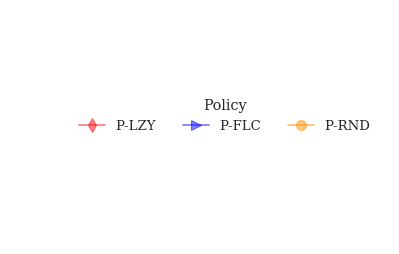

In [20]:
labels = ["P-LZY", "P-FLC", "P-RND"]

markers = ["d", ">", "o",]

colors = ["red", "blue", "darkorange"]

f = lambda m,c: plt.plot([],[],marker=m, color=c, linewidth = 1.8, markersize = 10, alpha = 0.5, label="none")[0]

plt.axis("off")

handles = [f(markers[i], colors[i]) for i in range(3)]

legend = plt.legend(handles, labels, title = "Policy", loc = "center", ncol = 3, frameon=False)

def export_legend(legend, filename="policy_legend.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)
    
export_legend(legend)
plt.show()